## 이상치 판단 방법
1. IQR 규칙 활용
  - 변수별로 IQR 규칙을 만족하지 않는 샘플들을 판단하여 삭제하는 방법
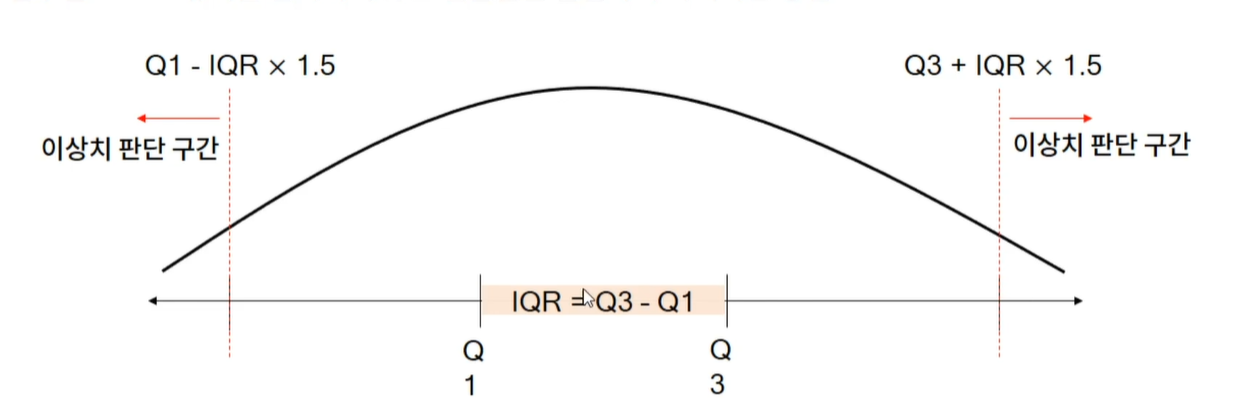

- 단일변수에만 적용가능 되고 다른 특징이 추가되면 이상치가 아닌경우도 많다.

### numpy.quantile
- Array의 q번째 quantile을 구하는 함수
- 주요 입력
  - a : input array(list, ndarray, array 등)
  - q : quantile( 0과 1사이)

In [1]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-5.-머신러닝-모델의-성능-향상을-위한-전처리\5. 머신러닝 모델의 성능 향상을 위한 전처리\데이터')

In [2]:
df = pd.read_csv('glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Glass_type
0,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,1
1,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,1
2,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,1
3,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,1
4,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.11,1


In [4]:
# 특징과 라벨 분리
X = df.drop(['Glass_type'], axis = 1)
Y = df['Glass_type']

In [5]:
# 학습 데이터와 평가 데이터 분리
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
Train_X.shape

(160, 8)

In [8]:
import numpy as np
def IQR_rule(val_list): # 한 특징에 포함된 값 (열 벡터)
    # IQR 계산
    Q1 = np.quantile(val_list, 0.25)
    Q3 = np.quantile(val_list, 0.75)
    IQR = Q3-Q1
    
    # IQR rule을 위배하지 않는 bool list 계산 (True: 이상치 X, False: 이상치 O)
    not_outlier_condition = (Q3 + 1.5 * IQR > val_list) & (Q1 - 1.5 * IQR < val_list)
    return not_outlier_condition

In [9]:
conditions = Train_X.apply(IQR_rule) # apply를 이용하여 모든 컬럼에 IQR rule 함수 적용
conditions

,RI,Na,Mg,Al,Si,K,Ca,Fe
25,True,True,True,True,True,True,True,True
202,False,False,True,True,False,True,True,True
50,True,True,True,True,True,True,True,True
59,True,True,True,True,True,True,True,True
127,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
47,True,True,True,True,True,True,True,True
181,True,True,True,True,True,True,True,True
96,True,True,False,False,True,True,True,True
54,False,False,False,True,True,True,False,True


In [10]:
total_condition = conditions.sum(axis = 1) == len(Train_X.columns) # 하나라도 IQR 규칙을 위반하는 요소를 갖는 레코드를 제거하기 위한 규칙
Train_X = Train_X.loc[total_condition] # 이상치 제거

In [11]:
Train_X.shape #  50개 삭제됨

(111, 8)